Step 1: Import the needed libaries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This is a great example I found about learning the relationship between test studying, sleep and grades.  You can see it at: 

https://www.youtube.com/watch?v=bxe2T-V8XRs or the Github:
https://github.com/stephencwelch/Neural-Networks-Demystified

In [3]:
# X = (hours studying, hours sleeping), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100


In [4]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [5]:
y

array([[0.75],
       [0.82],
       [0.93]])

Now for the neural network. It inputs 2 values (studying and sleep) and outputs one value, a grade.  It does have 3 hidden layers and uses the sigmoid activation function we talked about in class.

In [6]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(z):
    #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
      #Helper Functions for interacting with other classes:
   
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
    
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [7]:
NN = Neural_Network()
yHat = NN.forward(X)

Just for fun-- what is the sigmoid of 1, 1.3 and 0.8 (from the slides)?

In [8]:
NN.sigmoid(1)

0.7310585786300049

In [9]:
NN.sigmoid(1.3)

0.7858349830425586

In [10]:
NN.sigmoid(0.8)

0.6899744811276125

Now let's look at our training here.  We did one epoch. How did we do???  What will happen if we recheck our input: [0.3, 1.],[0.5, 0.2],[1.,0.4]
We would hope to get: 0.75, 0.82, 093 in yHat.  Did we?

In [11]:
yHat

array([[0.32839503],
       [0.27260989],
       [0.22562357]])

Let's plot our failure :(

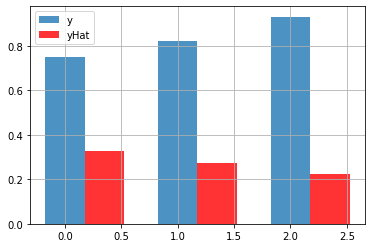

In [12]:
plt.bar([0,1,2], y.flatten(), width = 0.35, alpha=0.8)
plt.bar([0.35,1.35,2.35],yHat.flatten(), width = 0.35, color='r', alpha=0.8)
plt.grid(1)
plt.legend(['y', 'yHat'])

Not bad at all, and we see how we can minimize a cost function based on the 1/2(y-yHat)^2. This is a "sum of squares" cost function we saw in Kmeans with a 1/2 added to the front (we will see why we added that 1/2 later).  It works well!!!
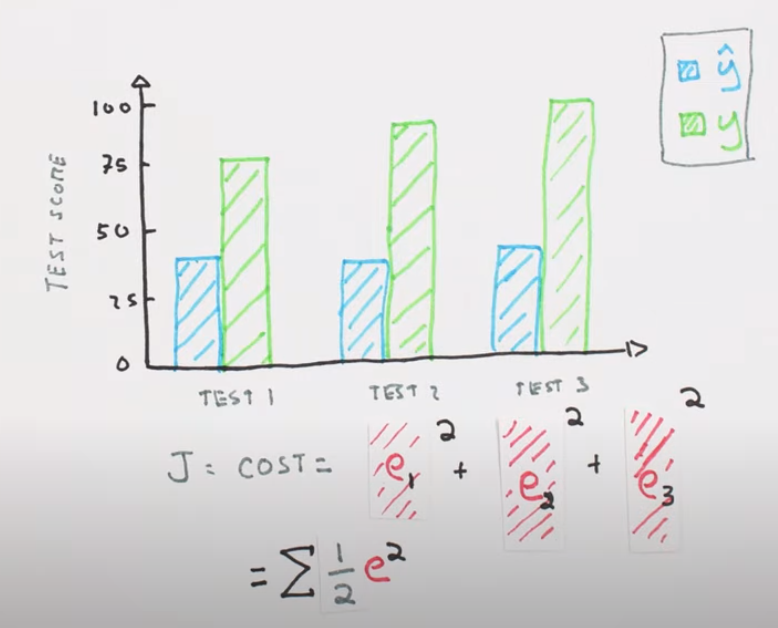

In [13]:
NN.costFunction(X,y)

array([0.48676642])

To do better, we need to learn the correct weights and we will use gradient descent.  Why not just check all possibilities?  It doesn't take too long to check 1000!

In [14]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.process_time()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.process_time()
timeElapsed = endTime-startTime

In [15]:
timeElapsed

0.015625

Text(0.5, 0, 'Weight')

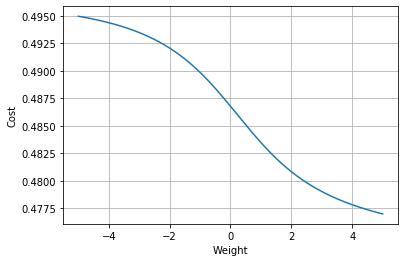

In [16]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')

So why can't we do this for the whole neural network? Because even with two hidden nodes, this would take a long time.  Here's the loop with two:

In [17]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.process_time()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.process_time()
timeElapsed = endTime-startTime

In [18]:
timeElapsed

12.5625

We could use something like a solution we saw with the 8 queens problem!  One idea, let's use gradient descent.  
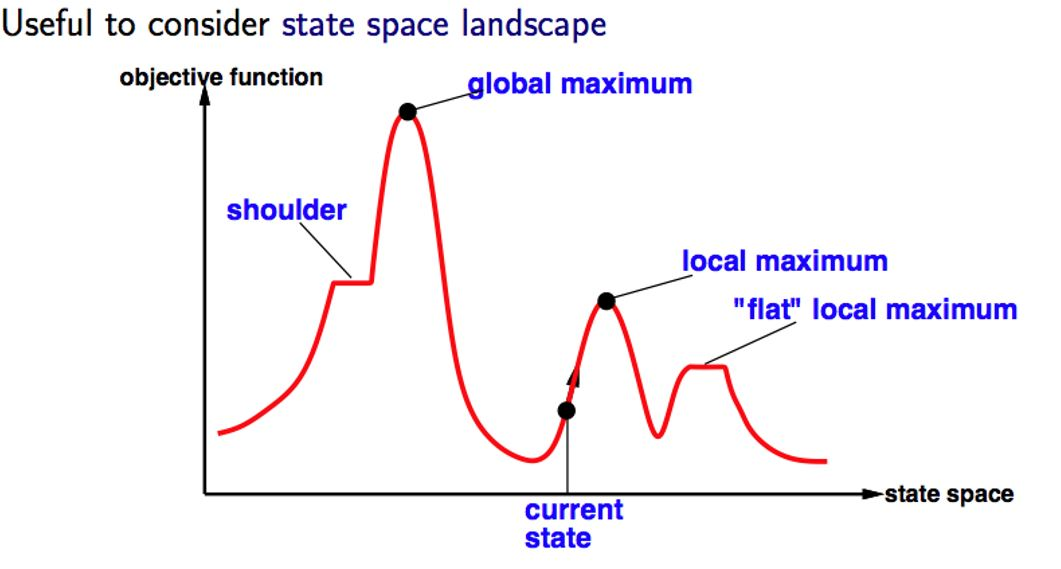

The key to gradient descent-- derivatives-- they can tell us which way to go. A negative value has we are sloping down, and a positive one says we are sloping up.  Here is the derivative of a sigmoid:

In [19]:
def sigmoid(z):
     #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

A reminder from infi: Your derivative is biggest when the change is the biggest. Here is that relationship graphed:

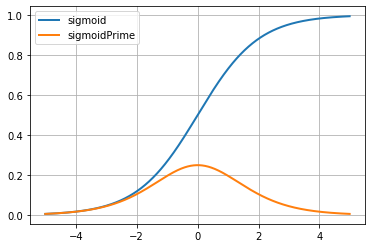

In [20]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

We need to distribute the difference to the previous layer. Bigger weights will need to change more, and smaller weights will need to change relatively less.  Now comes the trick we used earlier: the derivative of 1/2(y-yHat)^2 is just y-yHat!.  As a result, we can work with this formula:
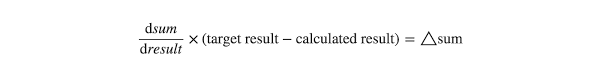.  Going back to the class example: dsum of 1.35*.77 is:

In [21]:
sigmoidPrime(1.235)*-0.77

-0.13439890643886018

In [22]:
sigmoidPrime(1)

0.19661193324148188

The code from here to the end shows that the process can be done automatically.  Here are the cost functions:

In [23]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [24]:
dJdW1

array([[-0.00062678,  0.02144656, -0.0256826 ],
       [-0.00127707,  0.04421562, -0.02080775]])

In [25]:
dJdW2

array([[-0.24178526],
       [-0.238952  ],
       [-0.09586809]])

In practice, a "learning rate" is added. This is a scalar to make these differences bigger.

In [26]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)
print(cost2)

[0.93173292]


Here is the series of epochs to minimize the cost

In [27]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 47
         Gradient evaluations: 47


Text(0, 0.5, 'Cost')

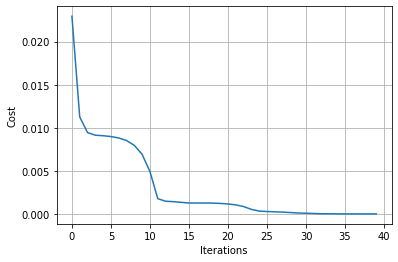

In [28]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')